data/gs53.jpg


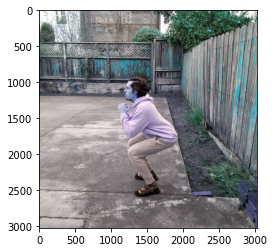

In [3]:
import collections
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt

protoFile = "openpose-master/models/pose/mpi/pose_deploy_linevec.prototxt"
weightsFile = "openpose-master/models/pose/mpi/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14], [14, 8], [8, 9], [9, 10],
              [14, 11], [11, 12], [12, 13]]

userImageInput = "data/gs53.jpg"
print(userImageInput)

plt.imshow(cv2.imread(userImageInput))

In [23]:
img = "images/White.jpg"

frame = cv2.imread(userImageInput)
print(frame.shape)
frameWhite = cv2.imread(img)

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
frameWidth1 = frameWhite.shape[1]
frameHeight1 = frameWhite.shape[0]
cv2.resize(frame, (480, 640))
cv2.resize(frameWhite, (520, 740))
threshold = 0.1

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

t = time.time()
inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

(939, 626, 3)


In [24]:
net.setInput(inpBlob)
output = net.forward()

print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 1.801


In [25]:
import sys

H = output.shape[2]
W = output.shape[3]
points = []
points1 = []

minx = sys.maxsize
maxx = -1

minx1= sys.maxsize
maxx1= -1

boolList = []

for i in range(nPoints):
    
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original RunningImage
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
    x1 = (frameWidth1 * point[0]) / W
    y1 = (frameHeight1 * point[1]) / H

    if(x > maxx):
        maxx = x
    if(x < minx):
        minx = x
    if(x > maxx1):
        maxx1 = x1
    if(x < minx1):
        minx1 = x1
    
    if prob > threshold:
        #cv2.circle(frame, (int(x), int(y)), 8, (0,255,0), thickness=-1, lineType=cv2.FILLED)
        #cv2.circle(frameWhite, (int(x1) + 70, int(y1)), 8, (0,255,0), thickness=-1, lineType=cv2.FILLED)
        boolList.append(True)
        points.append((int(x), int(y)))
        points1.append((int(x1), int(y1))) #+70
    else:
        boolList.append(False)
        points.append(None)
        points1.append(None)

In [26]:

buff = (maxx - minx)/2
if(buff == 0):
    buff = 1
buff1 = (maxx1 - minx1)/2
if(buff1 == 0):
    buff1 = 1 


mid = frameWidth/2
newmin = mid - buff
diff = newmin - minx
print(minx)
print(newmin)
print(diff)

mid1 = frameWidth1/2
newmin1 = mid1 - buff1
diff1 = newmin1 - minx1

for i in range(nPoints):
    if boolList[i]:
        p = points[i]
        p1 = points1[i]
        points[i] = (int(p[0] + diff) , int(p[1]))
        points1[i] = (int(p1[0]+diff1), int(p1[1]))
        x = p[0] + diff
        y = p[1]
        x1 = p1[0] + diff1
        y1 = p1[1]
        
        #torso colors
        if(i == 14 or i == 1 or i == 0):
            rgb = (255,0,0)
        #leg colors
        elif(i == 11 or i == 12 or i == 13 or i == 8 or i == 9 or i == 10):
            rgb = (255,165,0)
        else:
            rgb = (0,255,0)
            
        if(i == 8 or i == 11):
            rgb = (0 ,0, 255)
        
        cv2.circle(frame, (int(x), int(y)), 8, rgb, thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frameWhite, (int(x1), int(y1)), 8, rgb, thickness=-1, lineType=cv2.FILLED)

163.30434782608697
170.10869565217394
6.804347826086968


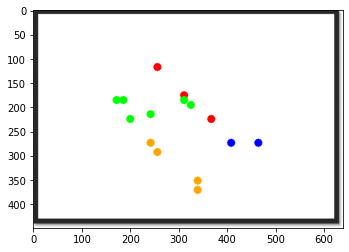

In [27]:
plt.imshow(frameWhite)

In [28]:
#rightHip = [9,8,14]
#leftHip = [12,11,14]
dictAngle = {'leftKnee': [11, 12, 13], 'rightKnee': [8, 9, 10], 'topTorso': [0, 1, 14],
            'botTorso1': [8, 14, 1], 'botTorso2': [11, 14, 1], 'rightHip' : [9, 8, 14], 'leftHip' : [12, 11, 14]}
dictAngle = collections.OrderedDict(sorted(dictAngle.items()))


usernameDict = []
userangleDict = []
heightAngle = [290, 310, 330, 350, 370, 390, 410]
j = 0

for i in dictAngle:
    dictPoint1 = np.array(points[dictAngle[i][0]])
    dictPoint2 = np.array(points[dictAngle[i][1]])
    dictPoint3 = np.array(points[dictAngle[i][2]])

    if str(dictPoint1) != 'None' and str(dictPoint2) != 'None' and str(dictPoint3) != 'None':

        ba = dictPoint1 - dictPoint2
        bc = dictPoint3 - dictPoint2

        tup1 = points1[dictAngle[i][1]]
        if i == 'leftHip' or i == 'rightHip':
            pointAngle = (tup1[0] - 50, tup1[1])
        if i == 'leftKnee':
            pointAngle = (tup1[0] + 15, tup1[1] + 18)
        #where the angle will be written
        if(i == 'torso'):
            pointAngle = (tup1[0] + 15, tup1[1])
        if(i == 'botTorso1'):
            pointAngle = (tup1[0] - 80, tup1[1] + 15)
        if(i == 'botTorso2'):
            pointAngle = (tup1[0] - 80, tup1[1] - 15)
        if i == 'rightKnee':
            pointAngle = (tup1[0] - 50, tup1[1])
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        ang = str(np.degrees(angle))
        angleFloat = float(ang)
        ang1 = round(angleFloat, 2)
        cv2.putText(frameWhite, "Right Side", (15, 40), cv2.FONT_HERSHEY_DUPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frameWhite, "Left Side", (500, 40), cv2.FONT_HERSHEY_DUPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frameWhite, "User-Image", (700, 420), cv2.FONT_HERSHEY_DUPLEX, 0.3, (0, 0, 0), 1, cv2.LINE_AA)
        #cv2.putText(frameWhite, str(ang1), pointAngle, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frameWhite, str(i + ": "), (15, heightAngle[j]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 1,
                    cv2.LINE_AA)
        cv2.putText(frameWhite, str(ang1), (90, heightAngle[j]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1,
                    cv2.LINE_AA)

        usernameDict.append(i)
        userangleDict.append(ang)
    else:
        usernameDict.append(i)
        userangleDict.append('0')
    j += 1

for pair in POSE_PAIRS:

    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.line(frameWhite, points1[partA], points1[partB], (0, 255, 255), 2)
        # cv2.circle(frame1, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

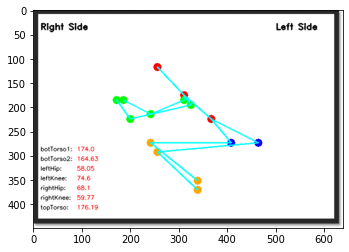

In [29]:
plt.imshow(frameWhite)

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV0AAAD8CAYAAADUv3dIAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/d3fzzAAAACXBIWXMAAAsTAAALEwEAmpwYAABSg0lEQVR4nO2dd3iUVfbHP3cmvZAOhJ7Qe69SFNYCilgQsIGuwIK9rGvbXRfdn22tWJfdVbGBFAFFsNBEFOkgTRFCSWIIIaS3SWbu748zE4YQIAkpM+F+eObJzH3LnHeY+c6Zc+85R2mtMRgMBkPtYKlrAwwGg+FCwoiuwWAw1CJGdA0Gg6EWMaJrMBgMtYgRXYPBYKhFjOgaDAZDLVJjoquUukIp9atSar9S6tGaeh6DwWDwJlRNrNNVSlmBfcClQBKwCbhRa72n2p/MYDAYvIia8nT7Afu11glaaxswFxhTQ89lMBgMXoNPDZ23KZDo9jgJ6H+mnUNDQ7Xdbq8hUwwGg6FmsVqttGrVCj8/P5RSAGzZsuW41jqm7L41JbrnRCk1FZgKEBUVRaNGjXA4HOXu6wqBKKVOuX8uqnJc2f2qctz5Pte5zlPec53L5tp8rnMdV5FjzOtxZrtr471Z1eNq6vPj6f+HYWFhvPXWW8TFxREUFISfnx8Wi+VweddaU6KbDDR3e9zMOVaK1noWMAsgLi6u3MBy2XhzRd4EVX2jnuu53M9xNs73jeq6X5HnK89mpdRZj6vO53Kdp7zHFTmuMm/uyhxXGRtr87lc41V9rjOdu6Ze+6ocV1Gbz8SZnqu23tPneq4zHWe32/n9998JCwvDx8cHX1/fMx5fU6K7CWirlIpDxHYCcFNlThAZGXlWww0Gg6GuOHHiBDabrVToHQ4HGRkZ5OTkEBERcZowu1Mjoqu1LlFK3Q18DViBd7XWuyt6vJ+fH8899xydO3euCfMMBoOhytjtdu655x62b98OnPSwi4uLsdvtZxVcqMGYrtZ6GbCskseUuvahoaFERERU6Ce9wWAw1BbFxcVYrdYqH+9xGWnlBbYNBoPBU3DXqHN5teXhcaJrMBgM3kRlhbfOloyVh/FsDQZDfcejPN2quOoGg8FQV1RkiVlZPEp0wQivwWCo33hUeMFgMBi8iapMqnmcp1sWrTU5OTkkJSVx5MgR8vLySjPE8vLyOFvNBpvNRn5+/mkvTHFxMQUFBWd8kRwOB9nZ2Rw6dIjc3NzS58vPzz/t+RwOB3l5eWdMYTYYLhS01thsNgoLCyskQFprTpw4UfoZO9vn2XXu5ORkjh49Wroe1vV8ZfctLCzEZrPV6i/nioYZPF50bTYbEydOZODAgQwePJiLL76Yb775ho0bN3LJJZfw5ptvUlxcXO6xjz32GJMnTz5t/JNPPmHcuHFkZWWdts3hcDBnzhz69+/PkCFDuOyyy1i/fj3ffPMNw4YN4+OPPz7ljfHDDz9w+eWXk5KSUn0XbTB4IVpr3njjDe64447ThLC8fVevXs0ll1zC3//+d9LT07nqqqv4/PPPy903JSWFsWPHMmjQIAYOHMjTTz9NYmIi99xzDxMmTCA1NbV0/8LCQqZNm8abb75Z46Lr9THd8i6gsLCQgwcPEhMTw/Tp04mNjWXq1KkcPnyY5ORkHA4HFouFkpISMjMzycvLIzc3F4fDQUJCAomJieTm5pKRkYHdbqe4uJgDBw6wefNmMjIyTvtPWbFiBffffz89e/bkrrvuIigoiL/97W9kZ2eTmJhITk4OFouF4uJiMjMz2blzJ7/++iuZmZkAFBUVkZmZWevfsgZDXeNwODh8+DBbtmzBZrOdss1ms53yuSgsLOTpp5/GYrEwbtw4jh8/zq+//srOnTtP+9WYm5vLtGnT2Lt3L1OmTGHMmDF8+OGHfPPNN6Snp5OSklKaFZabm0taWhobNmzgyJEjpSm62dnZ5OTkeMRn0qNE92y0aNGCMWPG0LFjR7Kzs0ur+bRo0YKioiJef/11unXrxuDBg7nooovYu3cvAIcOHWLYsGH06tWLd999lxUrVvD6669z7NgxXnvttdN+zsTFxdGkSRMyMjJo0aIF77//Pp988gndu3cnJCSErl27UlhYyBNPPEG3bt146qmnSs+RlpbGxIkT6dKlC/fcc0+5om4w1GdcoTh3UlNTmT59Op07d2b69OmkpaXx4IMP8uOPP7J//36OHDnCnXfeSWpqKrNmzeLgwYOnHB8QEEDPnj0pLCzEbrczadIk1q1bxw033EB8fDzNmzcnPDycH374gaFDhzJw4EASExNLC9HMnTuX3r17M3DgQNasWVOtocB6nRzx1VdfMXjwYP7zn//w7LPPEh4eTm5uLgcOHOD111/n5ZdfZtKkScTFxbFv3z6OHDkCQEZGBoMHD6Zr1668+OKLNGjQgAEDBhAcHMzgwYOxWE59Cdq0acMnn3yC1Wrl/vvv54477iAnJ4fjx4+TmppKRkYGTz31FAsWLGDSpEn06tULh8NBTk4O06ZNY+XKlcTGxjJ//nyeeeaZunipDAaPoaCggPvuu4/PPvuMpk2bsnjxYp5++mmuvfZaGjZsSOvWrenVqxfXXnstwcHB9OnTh+jo6FPO4evry1/+8hceeOAB3n//fcaMGcPSpUsJDAxkz549ZGdns337diZOnEiHDh2YNGkSVqsVh8PBsmXLuPvuu/H398dmszFlyhQOHDhQR6+G4DWi26tXL3r06EG7du0YP358ae5zYWEhq1evpkePHvz1r3/lzjvvxGq1loYpunXrxssvv8yVV15JamoqUVFRXHTRRQQHBzNo0KDTRBdEeD/99FO+/PJLCgsLueOOO0rjv3a7na+++ophw4YxY8YMrrvuOnx8fMjLy2Pt2rXk5+eTkJBQGtIwnq7hQiY9PZ0ffviBgoICEhISyMnJITk5mUsvvZQmTZrQvn172rRpw+jRowkNDaV///6EhYWddh5/f3/uvPNO1q9fz/Tp03n88cf54osvSr3Wbdu2kZaWxlNPPcVf/vIXYmNjsVgsrFmzhqysLH7//XdSUlLIyck5Z7y5MlQlocujRPdsAtW2bVteeOEFEhMTmTdvXumL7efnR8+ePdmzZw9r165lxYoVp1T68fHxqVRxit9++40pU6bwySefUFJSQosWLdi/fz/Hjh0DwGKx0K1bN7Zu3crq1avZsmULDoeDwMBA2rdvT6tWrZg2bRpRUVGEhIScx6thMHgnBQUFbNy4kfXr15Oamkrnzp1p0aIF06ZNIzY2lsaNG1fqJ77NZuO1117joYceYt++fbRq1QqtNVu2bCndJy4ujuDgYBYuXMjatWvJyMgAoFOnToSGhjJ+/HiGDh1KYGAgvr6+deoMefw6XV9fX6Kjo2nZsiU9e/Zk+vTpvP/++wwaNIiGDRvSrFkzJk+ezKFDhxg7dmxpQF0pRXR0dGm8NSIigubNmxMcHExkZGRpa42yNG7cmMjISP76179SUFBAZGQkf/vb3+jVqxdNmzYlIiKCGTNm8MADD3DdddcRHBxMVFQUsbGxvPLKK9x77728/vrrdOjQgcsvv7x0os9gqO9YLBaioqI4fvw4119/PSCiN3PmTB599FFmzpxJ586dGT16NHa7ncjIyNJQQlBQEA0bNqRJkyanndfX15euXbvy4Ycf8tFHH+Hj48OgQYOYNm0a//rXv0hPT2fw4MHMmDGDf/7zn+Tm5hIUFER0dDQTJkzg0KFDzJo1C6UU06ZNq1ZnqKLNDdypkW7AlSUuLk4HBQWVCqS/vz+zZ8+mR48eaK3Zv38/DRs2JCwsjNzcXJKTk2nVqhUHDhwgPj6er7/+mg8//JDY2FgSExPZsWMHX3/9NeHh4eTl5dGqVStycnJITU2lTZs2ZGRkkJWVRatWrcp9wYqLi9m6dSuJiYn06NGD+Ph4QLzg5s2bExgYSGZmJmvXrqV169ZYrVbatm2L1WolOTmZjRs30r9/f5o0aWLqSRguGLTWpKamsmnTptIC382bN6d3796cOHGCtWvXMmDAAGJjYwE4ePAgoaGhxMTE4HA4+PXXX4mLiyMgIOCM516/fj1hYWEMGDCAwMBATpw4QU5ODi1btsThcLB161aOHz9O+/btCQkJISYmBpvNxg8//ICPjw8XXXTReZVlBPG8b7/99lM87aCgIO666y569OhBq1atCA8Px8fHZ4vWuk/Z489LdJVSh4AcwA6UaK37KKUigU+BVsAhYJzWOuNs5zmb6J4LrTWJiYk8/vjjLFiwgGbNmvHMM88wduxY42EaDIZq50yie/fdd9O9e/dzim51hBcu0Vofd3v8KLBSa/2cUupR5+NHKnKiqniFrm/TN954g/Hjx9O6dWs6dOhgBNdgMNQ4VdGsmojpjgEudt6fDayhgqJblfgIyIWHh4czevToSh9rMBgMtcn5uoMa+EYptUVJS3WARlprV07sUaBRpU7oATFmg8FgqAjlJYOci/P1dAdrrZOVUg2Bb5VSv5QxSCulyrXIKdJTAaKioggKCjpPUwwGg8HzOS9PV2ud7Px7DFgE9ANSlVKxAM6/x85w7CytdR+tdZ/Q0NDzMcNgMBjqhFoteKOUClZKhbruA5cBu4DPgUnO3SYBSypxTrPEymAw1GvOJ7zQCFjkFEkf4BOt9VdKqU3APKXUHcBhYNz5m2kwGAyeR1Um/6ssulrrBKB7OePpwIiqntdgMBjqM2Yxq8FgMFQRry94YzAYDPUdjxJds0bXYDDUdzxKdMEIr8Fg8B7qdecIg8Fg8ERqOyOtWjFrdA0GQ33HozxdE1owGAzehNe3YDcYDIb6jkeFF8B4uwaDwXtw16uKapfxdA0Gg6EaqGiYweM8XYPBYPAWPKVzRJUxqxcMBkN9x4QXDAaDoYqY5AiDwWDwcIzoGgwGQxXx+ipjZrmYwWCo75xTdJVS7yqljimldrmNRSqlvlVK/eb8G+EcV0qpmUqp/Uqpn5VSvWrSeIPBYKhLaiqm+z5wRZmxR4GVWuu2wErnY4CRQFvnbSrwdmWMMasXDAaDt1FZ4T2n6Gqt1wInygyPAWY7788GrnEb/0ALPwHhrs7ABoPBYKh6TLeR1jrFef8o0qQSoCmQ6LZfknPsNJRSU5VSm5VSm3NycqpohsFgMNQddVLwRotvXenAhtZ6lta6j9a6T2hoqGvsfM0xGAwGj6aqopvqChs4/x5zjicDzd32a+YcqzBGeA0GQ32mqqL7OTDJeX8SsMRtfKJzFcMAIMstDGEwQH4+HDwINltdW2IwnDda6+rvHKGUmgNcDEQrpZKAJ4HngHlKqTuAw8A45+7LgFHAfiAfuL1S1hjqL/n58OKLsGEDrFkDo0bBkCEwbRr4+dW1dQZDrXFO0dVa33iGTSPK2VcDd52vUYZ6Rn4+PPQQ/Pvf4PIKFiyAxYshKwseecQIr8Er8fqMtKrMBBq8gJ07TxVcFyUl8PzzcPRo3dhlMNQBHiW6hnrKvHmlgpsRHs60t9/mx4EDZVthISxZcpaDDQbPxVQZM3gmBQWld3/p0IGPb76ZcfPmsX7AABHjwsI6NM5gqF2M6BpqnokTS+8O+Okn3rrzTjLDw5kwdy7J8fEwbtxZDjYYPBevj+maNbr1lM6d4UaZj1XALR99xNvTp5MREcE/580jv3HjurXPYKhFPKpdj6GeEhoqE2nR0bBpE2rTJm5OTkZ//TX33HADCngJCKxrOw2GSqK1rrS361Gia1Yu1GNCQ2HmTMjOhoMHsbRrxy2BIrP3OHcxwmvwRqo9OcJgqFYaNIDu3QGJbd2CFO64Dwk9vIgRXkP9xqNEtyquusG7cQkvnBTef2GE1+AdeH0LdsOFiRUR3j3Ay4jnazxeQ33F40TXrGC4MLECDwBbgFkYj9fgHZjkCINX0xj4CBgG/Bv4C1Bw1iMMBu/DiK7Bo3AX3reBxwBHnVpkMJyZOukcUZ2YgjcGOCm8FwOfAOupQmsSg8FD8SjRNRhcNAY+BroD44EfMcJr8DxqJKarlHpXKXVMKbXLbewfSqlkpdR2522U27bHlFL7lVK/KqUur7RFBoOTRojH2wER3h/q1hyDoVqoiKf7PnBFOeOvaK17OG/LAJRSnYAJQGfnMW8ppawVNaYqrS8M9ZtGSIihIyK86+rWHIPhFGqk4I3Wei1wooLnGwPM1VoXaa0PIm17+lXaKoPBjYZIqKET0hfq+7o1x2A4L84npnu3UupnZ/ghwjnWFEh02yfJOXYaSqmpSqnNSqnNOTk57uPnYZKhvtIQ8Xg7YTxeg3dTVdF9G2gN9ABSkFollUJrPUtr3Udr3Sc0NLSKZhguJGKAfwI5nIzxmmCUoS6pSki0SqKrtU7VWtu11g7gP5wMISQDzd12beYcqxDGyzWci/5I4kQ2EmowqxoM3kaVRFcpFev28FrAtbLhc2CCUspfKRUHtAU2np+JBsNJFHAj8A4ivOMx63gNdUdVcgvOWXtBKTUHWacerZRKAp4ELlZK9UDe64eAPwForXcrpeYhtUtKgLu01vaKGmOqjBkqggJuct6fBtwM/ISsdDAYPJ1ziq7W+sZyhv93lv3/D/i/qhpklowZKoLL49XA3Ygn8DIQVJdGGQwVwOOqjBkMFcXCSY/3budfI7yG2sTdSayow2hE1+DVlBVeV7+1IICiInA4ICAATNjKUMNUNDRqRNfg9Vg4GWq4ByA3l5fmzCFo8WJITYVbboGRI6FdOyO+hmrF6ztHmEk0Q1Wx4vR4Cwq4VykoKeGl1asJKiiALVvgv/+F+fOhQwcjvIY6xaNE12A4H6zATS+9xLaQEGbeLVHelx56SIR392546CH48su6NdJQr/D6Fuxm5YLhvMjNxbpqFY/u2sXujh35z5QpaKV4+cEHRXh37YJDhyAurq4tNVzAmHq69YgSSkgkkVxyT9tWSCFHOEIRRXVgWS1RVAT799MwLY0Pb72Vvps28Z8pU3jw5ZfJDwyEY8fkZjBUEzVSZay2MXHdymPHzsd8zB3cQVe6MoYxPMETZJNNIYU8z/NMYAId6cgt3MKrvIoNW12bXf1ERsK4cSTEwdN/SyMj4hccViv/mTKFB155heRrrkH36VPXVhoucDwqvGCoPHbszGY293IveeQBsIpVrGY1CSQQSyyv8RoOZ6exBSxgMYvJIIMneAI//OrS/OpFKRIm9Gf8RD82d7XJ+jEKcViL+c+UKSy//XbmWq0Mqms7DfWGqsR0PcrTNV5u5ckjj7/z91LBdaHRzGUur/JqqeC6KKGEF3iBIxypTVNrhf/12c7mbi7BBdgHzENbFIl+fqVFcgyG6qJWqowZPIeVrCSddOcjX+BhpBqBqI4uLQUTiqxijQfAho3FLK5NU2ucLLL4iq+cj5oDUcjq3ceArYCUvDPCa6hLjOh6OfnkY8dVUygMmAo8A8SW2dMXuBIp//0CmtblTrh5MzYcHCQa+BuwFil5/g6QhlTizSQOqao/FpHigjqy1VA/8PoW7GbJWOW5iquIJtr56DhwB9Jn4T/IylUXJxAP+P8Q8V1LOg+zH+8ui6iRcnZrgEmEk8PnwGWI2A5z/gVYDDzAQTRp/EQKq3gezRXsYBM73X4RGAw1i0eJLhjhrSzBBHMf9+GLr3NkA1Lmewit+Sc3c4vb3unAmyguYQCrWEkwFyMenzeJr3befgdeQOqOXgWAYg65tGUK8LxzDyGMMK7GDizhIG2A99CsZi1duIGDbGF37V6EoV5Qa50jDJ6DDz48xEM8y7OMYAS+OOjKcpoRQAqPMoG3uZd7GcAAFIqLuIg/M4kVXMNq4C9I5flLgCeABDxXfDXgQAIk1yJi+xZwKbAaWAKMJYr5zOUarqE5zWlAA0Yxivd4jzx+B55C3vZTkTLQcznMxTxDFL/gudduqD9UpIh5c+ADpEa0BmZprV9TSkUCnwKtkELm47TWGUoCHK8Bo4B84Dat9daaMd8AJ4X3Hu5hD3toSlMO48v1wPOEMJ/XCCaHfeyjAx0IJhiQSlz3IhNLnyI/xD8CbkWCFK3wjG9ljURlv0feiGuQtj2vAx2AlmX27053FrGIQxwin3w60JEd7GQjh4FuiDzfhgjvrcDtLGIm24H5QC/cFj8YDGehppIjSoCHtNadgAHAXUqpTsCjwEqtdVtgpfMxwEikTU9b5F39dkWNqUpQ2nASP/zoQQ9iiKEPIpw/Ah8CwYTSm96lgutOY+A+xFt8AFiIeL5PIt+mdeX9lSBi+wpwEfIFEQzMQ2Tzck4XXAA7YANCacXPdOJVFDfQmhyWA3OA4UhT9znI1b1Pa14nFfkC2orxeA01R0U6R6QgHX/RWucopfYiE8BjkF94ALMRB+QR5/gHWgIdPymlwpVSsc7zGGqRvwCZiHg2QL4Bz/aV1hgR3RuRduf/Br4G/gpcAbWSRqGBIqSx3kzgZyAPuB2YQvkiW+K87QJ2AquAzUgo4ggQAVxGMDa+J5EXgFwgye0MDq4lg3bAQ0jftU+RVtfuU5EGQ1lqvOCNUqoV0BOZrWnkJqRHOdmiqimQ6HZYknPsFNFVSk1FdICoqCiCgky9/+omAPEOP0c6KowEWlTguMbAg0ipxI+Bx53HP4B4lwE1YKsGMpDwxr+RtRZdES+3O/IGUs79ChGRXQpkIZ7pKqQ1ey7QB1m3cAXQBfBH2lJvpBPjyOfIKYILfenLnUyjBTAQifReAUwGZlA7XzaGC4cKi65SKgT55Xm/1jrbXd211lopValfZFrrWcAsgLi4OO0cq8wpDBWgFfAmskjsAeSneUW9t8aI5/cH4Dngj4gQ3oeIb3V8TdoQr/Q74D1ENG9DQiONEYHPQwR1GfLNPQf5ls9BhPh6YDQS+xoIhCOefVn60Y/5zOcTPmEJS4ggghGM4E7uJA6pPNYFmAtMQDpQOICnMcJrKJ8aK2KulPJFBPdjrfVnzuFUV9jA2ZLdVb4pGUkHctHMOWaoIy5BQg0zkcmnu6ncT5zuwPvANuc5piLidC+yIrZslNiOnWyyCSIIf/xPO59G2qfvAd4AvnWe7xZgIiKYWciXRSoiglagGAk9XIt8EdyE5JzFVPB6FIp+9KMvfXmCJ/DBhwgiTtuvOSLsExAPH4zwGqqPiqxeUEj3371a65fdNn0OTEKcoEnI3IZr/G6l1FxkkjmrMvFcM5FW/fgB/0DalD+GeIP9K3kOf8ST7ImI7+vIz/AuSHLxpUAgdpaylDWsYS5zuZiLGcQgpjCFAAKwISGEechSrwIkb+6fQCQSj30DETwb4sVGI7HcJojYgniyrlXJVUGhiCHmrPu0QOK6LzttPYp4/V0xKxsM50dFHISLkHU1O5VS251jjyNiO08pdQdwGJn4BfkVOApZb5+PzIEY6hhfRCivAO5E/pManfWI8nEX362ISP4JEaPOrOF9ppPjDN/PZS7zmc8BErmZ55mJYikSQujlPOYEMvvq67wFA9MQsb0B+cIIpW6ErjnwItAG+DOyEmQB4vkbDFBDE2la63Wc+T0/opz9NXBXpaxwYrzcmkMhlQimIT+V30WEpKoeoz/iMfdGYrIzsfMm3XHwIRKEWAUEYGc8r9ObWZxa52AfEjrohnjh3ZznsiDC6ynvBCvymoG8XtcjwtujrgwyeByVnYsy9XQvIBTiVWYjQhcOTD/Pc/oBg4AkPmcRb2Hjn0iKwfeIL90BBz5oTtCGCG5C0QSZ4BuCvAE9PVbqEl6FVK4Yi6yR7APlRKwNhrPjUaJbFVfdUDl8kImw5UhoYDgQTTrppNOa1lgrsTLVgaQN5wCvE4+NOxCfFWSRlwb+BfzK5YQxl1fxwzOy3CqLS3hHIRNsw5EY75M4hTc9HY4fh9atwcejPlaGGsTrW7Abaod4pALBeGAMBQQxjn1s4DIuYwxjuJVbsZQjjTmIyP4CLEIyv75F1s22ojNWCrEzDYnUfuvcww5oprEcfzwnbFAVLEhyxnxkAuMFAJuNJx9+GP916+CXX+Cyy2D0aJg0CawmtcJwOh4numatbs2jgH6k0pAF/MptSHR2LYtYxNd8TQkl3M7tHMTCCWS932wkJXc9EpaIRyaU3kPiwoNxMIN5vM7HbvV9haEMpSc9UV4tuYJC1kDOwym8ViuqYUP+vmsX/jYbLF4MX38NJSUweTJYvNGvN1QUd72qqHZ5nOgaaoeVfEMSf0bWIfwF+ALIJJ9m3EsW89HsRJIROiJCG4csW2mMTCQp3D1XP57l//DDhxWsYDvbaU1rutCFt3iLhjSszcurUVzCu/C773j/66955vHH2dK7Ny899BCd9+yBggJ49lm45RYwmZYXDBUNNRjRvQApoYQ5zEECA7cDPyABAwW0Ip/fOMQx/kIsnRGBjXIee7a3VQABPMdzFFDABjbQgQ40prHzOO/3ct1RdjtNXnqJR778kqD8fB597jnGLljAwuuvp+PevaijR2HFCrj66ro21VCDeH1M10yi1R4nY7b7kfSEkUidsR8I5Hde5U0uJ7bSUqlQBBHEJVxSneZ6JhYLVoeDe15/HYBHn3uOkcuXc/t773H73Lm0UPXtq8ZQHZiA0wWIDz6MZ7zzkQMpf3wF0m1hHU1QXMzFRjDOhtUKEybIXYeDu994g2cef5yjjRsz4x//YNjq1Tw9ahRHMGUiDafiUaJbldYXhqpxOZfzB/5w2ngwwTzBE/h5/OpZD+APf4ArrgDAx27n3pkzmfzf/4LWpMXG8p7VyjDkd0Qi8vVmMHiU6Bpqj4Y05CM+YjrT6U1vQghhLGN5m7eZxKRyl4wZyhAdDR98AHfeCX374hMQwEOHDtG7qIggpHr/VKRY0FCkR3MSRnwvdExM9wKmEY14i7c44fwXR1ylkiMMQEwMvPkmnDgB6enEx8Uxz8eHcUgpzflINajZSH/m/yIlMu9Aiv2Yr7YLD/N/biCSSNrQxgju+RAZCW3bgo8P8UhtiySkaE8uUt3tBySr7X0kdfqfyBpo4/l6L1UJhxrRNRhqgE5InYZDSGlIG+LZPoIkmNyJiO9ApACREV/vxbRgNxg8AB9EWJ9HilE/yckawY2QdJSfkHJ8szkpvr9jxLe+Y0TXYKghXMJ7NVKX90mk8wWI+DZExHcDUgh+NlJc/inE8zXreDyfqnQwP6foKqWaK6VWK6X2KKV2K6Xuc47/QymVrJTa7ryNcjvmMaXUfqXUr0qpyytqjFkuZqhv+ADPImUg/wWsKLNdIe2G/ox4vvcCHyCF4mdgxLc+UhFPtwR4SGvdCXkv3KWU6uTc9orWuofztgzAuW0C0BlZcf+WUqrCMzRGeA31jRZIgZy+iKhuLWcfl+f7ECK+92DEt75yTtHVWqdorbc67+cAe5FiqWdiDDBXa12ktT6I5Jn2qw5jDQZvpTnSTj4FKYJenvCCfCAbcqrn+yEivv9AkiyM+HoOVUnoqlRMVynVCilLtcE5dLdS6mel1LtKKVdb1abIe8NFEmcXaYPhgqAf8CrS5PJRpNzQmXCJ70NIb7Z7gY+QpWb/AI7UoJ2GmqXCoquUCkHasN+vtc5GEm5aI0WoUoCXKvPESqmpSqnNSqnNOTk5lTnUYPBKLMBkRHjXI2t3zya8rmMaIZ7vD4j4fgwMRibmDteQrYaKUSMTac4T+yKC+7HW+jMArXWq1tqutXYgyTauEEIy8mvKRTPn2ClorWdprftorfuEhoZW+QIMBm/CJbzDkfadj3Nu4QWJ+TZGxHcdIr6fIH3mnkTWAxu8g4qsXlDIUsO9WuuX3cZj3Xa7FtjlvP85MEEp5a+UigPaAhsrYowpeGO4EFDAO4i3+gYSu63MsY2RsMNaTorvMCTscBgT860rKqpdFfF0LwJuBYaXWR72glJqp1LqZ+ASJNUcrfVuZLJ2D/AVcJfW2n6GcxsMFxwu4ZyLTJDdBmyicmKpkAy3h4DvkCSLj4GLkfRiU1Ky9qm2zhFa63WU3zBg2VmO+T8kC9JgMJSDSzQ/QbLRxgELgN5VOE8T4GHgJmSlw3+R3nV3ABOR+J4J2nkOHpWRZmK6hguNJkhM9hiSPFGR+G55uPq2PQasQQT3f4jn+yxmna8n4VGia6gHaDvYsuDIQshNAEcJmDj9GbEgpR5nIj8dHwHy7bB1K3z5JRQVgaOSxRiaA08gYYc/IrPcQzgpvq7TaS1Ni/fvh88+g+xssJtAYKWoyhyUR9XTNXg5Jbmw9SFIXQ05+yGwCTRoD/3/B8EtwfyKKRcLEtfdj9Ro+OYbOPZHyEmHNm1g0iT485+lQ1BlcInvJKSi2Swk9DAZuE1D/kGYcgfs2wcpKVKZcsQIePFF08S4MlRWeI3oGqoHeyFsvhcSZlPqSxUky23dWBi6GIKa1aWFHo0VGLoDZhbCLwOAVsBR2LsX/v53+b56+OGqfW81A/6K9H1+HxHfWYBtOaTsQWIbiPju3y/e7syZ4O9//tdlOB2PEl2ttYnpeiu2DEhagktwCy3+FFt8ZVv2r3IzontWNq2E/HeQZQhzgPHARrDZYO5ceOAB8PWt+vmbIuuC/6jhsf0wewzQAQkmrwGcoYxFi+Dpp6Fhw/O8oAsAr2/BbvBiDn8KtkwAMn3DuHnQx+yI6H5yu3903djlReRMQZYxhAGhSKB3KGCDXbvg++9h+PCzn8MB5HD6pNkK4KDb480/Op/jOmTd2nIkxpEH6ekwfz7cddf5XpGhPDxOdE1yhJfSoD1Y/cFegENZyPcJ4rh/NEXWAEYnfU738C4QEl/XVno0P+6EVSvdBlYilc+B8OYQ0BSOu20+AHxT5hyFSI2GojLjdtyEWIHtRmA7UjkdYCdQIHcDAqBdu6pfx4WEu15VVLs8TnQNXkpUf/CPgvwkIm0ZfPHdaD5sdSsP9XqJPWGdeArojlkv6k4BkOX2WG+FVe8CtwD+wB+cN+DElXB1GSFUcFpXu0AkkymgzPhlgPtX3tr1MP5aKMk43a6GDaGfqQtYaaotOcJQjbi+Cetj3NovHPq+DetvA1s6ISV5TN0/C4vFhyd7v8b1ysI9wHRET+ozmchPfHc+BxLKjCUAq9weF00BbgbyOCU+EBkF44OkupQ7ccCIMmMKCOHca0GvGgiP3gXPPw/FxSfHY2Lg7behQYNznMAA1IOYbnkXUFhYSFpaGs2aNTttu9aao0ePEhQUxO7du9m1axchISFcdtllREdXPoZYXFzMzz//THx8POHh4Wd+QbWGpCTIyZHfYevXw8GDYLGIi9C2rbTkTk6Grl1FZLWGhAT4+Wfo3x9iY+uX+CoLNBkFQxZA2o9w8H2sjS9lcsxgLkNxE1Ks5ShSlNvbhLcQ6V/mjgMpNJ5eZnwLJwuRuAjj9GtuDzzjPuCPiO1XsPprSDgAk26TOG7HuOr9sPr5yaqIjh0lVrxqFdx2GwweLLf69Nb0NDxKdMuLiaSkpPDee+9x++2307x5c6xWK+np6TgcDiIjI1mwYAHt27cnIiKCH374gYEDB2KxWMjIyKCgoIDY2FhsNhtZWVn4+flht9spKCigcePGKKVISkoiKiqK4OBg1q9fzyuvvMLbb7+NzWajoKCA0NBQLBbLqQJ87Bg88wwMGgTt28vamsBAWLwYWreGFi3ghRfEXejaVQQ3JQX+/W8YMADeeAMeeQTCwmrvxa0NlAUaXQwNh0LHB0D5YrX4EIcU47gdKfDyG/B3JNxQl2ikOpetzPgapBaCO8eR+Kn7OzQUiCwzFoRkg5X9eT8MWbrljhXwK2tUAHAjTB0rS7f8/WtOAH194aabYNw48Xb9/cVvMNQsHiW65VFYWMj69eux2Wz06NGDrl27MnfuXBwOB2PGjGHXrl0UFBRw33330a5dOy666CJyc3N59913KSoq4oorruC3335j586dDBw4kB9//BF/f39GjRpFRkYGmzdvJiIigsmTJ9OlSxfatm2L1pqkpCSWL1/OpEmTCAkJOdWosDAYMkQ+FRYL9O0LERGwcSN07w5ffAFpaRAeLoKrFPz2m6x0HzNGFl8ePVr/RNeFsoA18JSh5iV5LN/1f/zb4svDnR7lZ6sfC1JW0L3RxTIBV42kcLr3mYzUJXDHAXzN6aGAGCCizFhTZG2rOy2Qif+y+HL+sWtf3/NbHlYZfHzkZqgdPP6lLikpoVOnTvztb39jxowZbNmyhfHjx9OgQQPmz59P+/bt6d+/Pz5u75qVK1cycOBAunTpwhtvvMGJEye48cYbad++Pb/88gs2m43MzEw2btzIY489xsKFC9m8eTNDhgzB6kz7ad68ObfeeitBQUGnhxn8/WWKNy9PBNVuh6VL4fLLJeSwcKGI7dq1cP31Em64kCnJg8334pvwHncCFKXzUseHuDasI1N1MQ/if7rHV4ZcxEN29yrtSIpr2bmgnUh2lzvByESS+/+kBfl5H1lm3y5IPdKyWDETgYbzx+NF18fHh+PHj7Ns2TKioqJo27Yt69atw9/fn3bt2mG320lISKBnz54EBQXh4+NDp06dWLNmDampqcTHxxMZGUlERARaa5o1a0ZmZiaHDh0iIiKCr7/+mqSkJIYNG4ZSiuDgYCwWC0lJSfz444+MHj2aBg0alC+8rkT1tDQ4fhwGDhT35KWXYOdO2LJF9ps9G3r0gEOHJARhs0lM90IhcxckvAdoLMBdv73J6OQvuGHIfP4a3IIcYLTb7t9w+s/7DKTbgjsKEciyP+Vv4PSmfBFINa+yx7tuBkNt4VGiW97EVXx8PA888AAHDx5k6tSphIWFsW7dOkpKShgyZAiFhYVs374dgJtvvpmwsDB8fX2xWq0cO3aM4cOHk52dTWhoKL6+vnTs2JHjx4+XerWrVq1iwoQJxMfHo7Vm8uTJREVFERQURJ8+fcr3dEHCC65KJCEhcP/9krCuFDRtCpGR0KcPBAfL5FpcHPzxjyLGf/oTOLtlXBAc/gSXj5ruF8lDvV4iJTCWfGsQdq15BnjG7TWOR6pvudMC+FuZMQvSM6y8MgFGSA21QVWyaM8pukqpAKRIvb9z/wVa6yedXSHmAlHIhO2tWmubUsofmdTtjYTWxmutD1XKKjf8/Pzo3bs3vXufrDQ6ZMgQl234+PgwePBgAAIDA0vHXfsrpfB3SyIfNGjQKee/5pprSvdTStGoUSMAQkJCaN++fflGKXWqaAYHy839xQ8IkBvIFDHIJFvr1ifPcaGgT5bJ+i20LZ81v44c3wY0y0tk4bpx7I27laeaXY0P0mjvSk6fdAIjpAbPpCa6ARcBw7XW3ZEmlFcopQYAzwOvaK3bIL/+7nDufweQ4Rx/xblflXGJYXm3M213Hz/XOcrW8D3btjKGnRRO9/tlt5/pdiHR6hZcktk/fQP/2TCFBrYs7MpKdEkOj0T04AXEu30TaTli59Sf/xfYK2aox5xTdLWQ63zo67xppLfeAuf4bOAa5/0xzsc4t49QporNhU1YZ4i7FRDxHHdkHt+vGEKXrN3cOOgjfgpoxL3Al87tVyMlDk1pV4OnU5PdgK1Kqe1IEbhvkbTvTK11iXOXJGRVDc6/iQDO7VlICOKclOemu5pVnmubw+HAbrdjt9urXL9Ba01JScm5j9dabg7Hqfddj137lH2stUy+uR9jt58cq6/4hkDfN6Hjw9BwGMriS7fApnyUu58u/tFMsPqzDlkxsAApfDUDWct7CNPxwFC/qNBEmrOxZA+lVDiwCPlcnBdKqanAVKB04sr5XKfsl52dzd69e+nnTAZXSp2yz86dO4mMjOTHH3/k22+/JTo6munTp9O8eXPORtnzOBwOVq1axdq1a7n88ssZNGgQljOtFHc44IcfRCwvvhhSU2HOHFmXe+ONsmLhl1+kOOlVV508bvt2WVo2aBAMHQqffALbtskk29SpkmBRX/EJgZ4vQHEO5CdCSDwNrQF8iJQauAmpZjgAWTs7C6nFshwR4jhMiMFQP6hU/onWOhNYjay+CVdKuUS7GbL+HOff5gDO7WGcvlYdrfUsrXUfrXWf0LPM5KelpfHee++xbNkycnJysNvtbN26lQ0bNlBYWMinn37KypUrGTJkCOHh4QwfPpyYmBh2797NmjVrKC4uJi0tjZ9++ol9+/axbds2VqxYQU5ODvn5+Xz11VccPnyYEydOkJqays0338zy5cvZv38/u3fvprCw8HTPNzUVFiyAxEQR3g8/lNUKsbGQmyspwP/4B+zYcfKYjAz46CNJnnCt7f3DH2T5WJMmF07FaN9QCOsEVplkbIgkLXRC4lIPAA2ARxFP9xdgLPJNb8INBk/D/Vd4tVUZU0rFAMVa60ylVCBwKTI5thr5PMxFOoIscR7yufPxeuf2Vfo86jUWFhby+++/c+zYMf7973/TsWNH9uzZg6+vLykpKdhsNux2O1FRUYSHh9O4cWN27drF119/TUREBIcPHyYhIQGtNX369GHp0qXEx8dTVFTEvn37CA8PZ+PGjdxyyy3ccMMNbNu2rXTZ2aZNm2jVqtXpRjVqJJ5qQYGI5rZtkvp78KCsTli0CJo3l9xKm00S3VNTYfdu8YaDg6X+QoMGsv/Bg1BYeMH2SGmELHe5FXgHyRR7EekXNhLpaHsT0l76PjxsnaPB4KSisd2KeLqxwGql1M/ImvVvtdZLkc/Eg0qp/UjM9n/O/f8HRDnHH0SclvOidevWjBs3juPHj/Pdd98xYsQIrrzySvbu3UvTpk1p3759aSYZwK5du+jbty9jxozht99+IzMzkyuvvJKhQ4fSr18/MjIyOH78OGlpaVx33XU0b96cAwcOsG3bNpYuXcptt91G06ZNufrqqwkIKLv0Hkn9dYUetBZRnTpVvNivvpI6C7//Dj/9JEVuCgtFfFu1gnvvhfx82LxZugL+6U/iHWeUU2PvAqIR4vFejIQW/ox4tn2Q8EI7pGvuw5xajNtgqEuqMpF2TqdBa/0z0LOc8QROT/xBa12IJAVVmvKMDw0NJTc3l1deeYVu3brRuXNnPvvsMywWC1dccQX5+fls2bKFrl270qJFC0JCQhg+fDizZ89m06ZNDBs2jJSUFCIjI7HZbKSlpeHr64u/vz9du3blzTffxMfHhy5dujBjxgw6dOjAl19+Sbdu3Vi3bh2TJk0irLwaCdHRslY3MFDiuO+/LwnsEydC48bScGrHDtnnjTckHbh7d3j1VQlFREfD66/LMXFxUlPvAqcRUoD7VuDfzrEXkdDDWmT94TPA90gBHVMS3eCNKE/o1BAXF6eDgoKwO9Nq/f39mT17Nj169MDhcJCVlcXx48dp2bIlvr6+HD16FK01jRs3xuFwcOzYMWJiYtBa4+Pjg1KK9PR08vLyaN68OSUlJVitViwWC2lpaeTl5dG0aVOUUhw5coSYmBh8fX1JTk6mpKSEwMBAGjVqRElJCUFBQadPqLmvQvD1lfspKZKZFhZ2MmZrt0sL14ICEeeSEtmvcWOJ4aaliZfbrJl4ywYAUpHOMeuQ0MKLSHHuYuCfwOtI38b7kbCDCTcYahObzcbtt9/Oli1bSh3FwMBA7rrrLnr06EGrVq0IDw/Hx8dni9a6T9njPf79arFYiIiIICLiZN2nWLe6BRaLhSZNyiaNQnR0dGlNXT83QWtYpttea1eGGNCmTZuKGaXUqWWZrFYRTnes1pM9s11VyqxWCTGcNMZ0/yuHRsBnwKdIDBdOCu9fkbZeE5ClLxnAXXjBG9lQ76nOmK7BUOsEIl7uTCTk8BCQj2TmdEPivF0REZ4GHK4bMw2GSuNRDoJJXDO4Y0HiuwD3IEkSjyPrEV1x3qcRL3g3soymZe2baTBUCo/3dB0OB0VFRaetgXN1g3AtGSspKSnNJisqKiInJ4djx46VxomrDa1l9UFyssRkHQ6J1R49KrV03e0sLpalYjabjB8/Lsfl5p75/IZTcAnvG8DHwEXIWkSFeMP/AP6CZK5dDbyLWc9rqD2qMifmUZ5ueRw7dow1a9Ywbty40jJqdrudjz/+mIiICHx8fGjXrh0nTpwAoG/fvixZsoTw8HAOHz7MLbfcUlpl7IwZZpVlyRL45hvo1g0mT5Z1uTt3SlWx6dMlSaK4WJImEhIk+WH8eHjySVlqNnYsDBtWPbZcALh7vHcC45DVCwORdjdPIQvCxwJ3IxNukzm9U67B4Al4vKebk5PDtm3byMjI4J133uGTTz7hwIEDfPTRR0RERPDll1+yZMkSfvvtNzZv3kxCQgLr168nIiKCPn36sHfvXv71r38xd+5cMjIyWLJkCQcPHqxyfQa0hl27RGCjosTLPXgQWrYUDzgzU/Y7cgQOHIC//lUy1Navl2aWERGSBOGqxWuoEAoR3reQybNxwE/ObRak39p8ZG3jn537ptS+mYYLDK/vBnymgsAOh4OXXnqJ5ORkCgsLCQgIoFmzZrRs2ZLmzZvTsWNH0tLSWLlyJQkJCezdu5ekpCR27NhBYWEh3bt3p6ioiOXLlxMfH09wcHDVjXQ4YORIySbbsUO8XD8/6QpRUHCybGNurqxMCAgQT7e4WAqdx8TA3LmyraWJQFYGl/CCeLw3IELb37mtB7ASifu+huSjfwo0rm1DDYaz4PGeLogY2+12evfuzciRI0uTIEJDQ4mKiiIkJISAgADGjRvHs88+S9++fbFYLNhsNiwWC9HR0URERFBQUEDDhg1PWUJWBWNEeGNjRUBTUiA7Gx5+GC69VLLQDhyQ9bupqRL3PXJEkiQaNJDjfH2hqKj6XqALCJfwrgJaIx7vRmSSTSGte55B4ry/IUvLfsJUKjN4Dh4numV/9kdGRnLppZdy5513kp2dTU5ODvHx8YwcOZKgoCCGDBnC7t27adGiBV26dMHX15ehQ4fSvn17hg8fjq+vL3PmzCEhIYFRo0axbt06UlNTq26gj48I76uvwp49cMcd0o7n1Vfh11+lJsN334mHO2AAzJwpnSP695cQw8svQ+/eEG/yqaqKQlIh5yDVx8Yj+emud04A8Cyy1vcA8AckxdgIr6G6OVPZ2bPh8Rlp7vYVFhZitVrxLdObuqioCD8/v9I8aPdjPvzwQzp16kS3bt1OOe68lqdpLaEEV59sh0Me+/mdmjShtdRdCAg4maVWVHSyl5rhvPkduBFZpzsfqdXg/sr+hKzl3YCsdLgVqWxmMFQV94w0F0FBQdx999107979nBlpHufplsW9bU5gYOAp4uq6BQQEYLFYym3PM3bsWLp3737acedplAinS8QtFqkc5ut7aksei0X2s1hOZrGV7aVmOC+aAJ8g63PHI2t13QM3A5Cyd7cgxXJuRirxGwzVQY11jqgtqkUQyxAUFHSaZ2yoXzRFhLcZksX2OKcKbxDS8HI68B1Sr2ElUkLSYKhtPEp0KxMfqUosxVB/aYrEeAciqcNPcLrwvggsQwqjX4t4xUZ4DbWNR4lueRQXF5Oenn6KwGqtOXHiBPv37+fEiRMUFhaSm5tLTk4OWmvS09NL71c7WkvZxm+/hRUrZKWCK3Z74MCp628LCmDDBlmfa74gahyXxzsQWTJW1uMNBEYgy8iikGVn/wTSatdMQz2lonrj8aKbkpLCBx98gNa6tMVOYWEhM2fO5ODBgyxatIjt27ezbt061q1bx48//sicOXOwWq0UFRWRlZWFw+FAa01WVhYFBQVorbHZbGRmZuJwOLDZbBQXF1dcpNPSpP/Zhx/C1q0itHPnwjvvyGQZyLrc2bNh7Vr4/HNJnDDUOM0Q4b0I6UJR1uNVwCBkgm0cks02Eafw2gsgPwn2vgzHvgdblvmyNFSYioZGK9KuJwCpLeLv3H+B1vpJpdT7wDCk2y/AbVrr7c52668Bo5DCULdprbdW+gqcFBUVcfToUfbs2cMHH3xAYGAgo0aNYtWqVQwbNoz169eTmppKixYtWLt2LWFhYTz++OPs37+fjz76iKKiIm699VasVisffPABMTEx3HbbbSxcuJD9+/czZswYMjMzCQsL45JLLqnYCzdoEHTqJM0nhwyRhpMrV0obH5APamYmfP+9tONp29bUy61FmgFfINXJHkGWij2DvIFBhLcRUhQdJMxwI/BAwvuM/PnvWIrSwScYAmNhwHsQPchMfhqqjYpkpBUBw7XWuUopX2CdUmq5c9vDWusFZfYfiXTTboskC73t/HtOziR4drudmTNnkp+fj9aao0eP0rlzZ7p06UKXLl3o2bMnv/32GxkZGYSEhFBcXMyBAweIjY2lX79+fPXVV+zbtw+LxUJqaioffPABq1evpkWLFqxevZpp06YRFBRUMcFVSkR1zRro2lVWI7zzjqxQ2LkT9u6V8fx8KYBz003w2WdSR7dHj4q8DIZqIBSpt6uQRAmX8Lo3XwpGCqLfqB3cUpLPzS1v5D9HV3F94kIsJbmQ8xv8MAGGLYWI7rV+DYb6SUXa9WjAVRbL13k722+uMcAHzuN+UkqFK6VitdZVSoW3WCwEBATQqlUrAgICCAoKKk3l9fHxITo6mvT0dPz8/Bg3bhwxMTH873//o3v37jRs2JDAwECsVitdunShcePGWK1WIiMjycnJoV+/fvj4+LB//34aNGhA9+7dKya8BQWS6HDffdIB4sEHpbDNsmWSebZsmSQ/dOkivdKKi2WtrqFWsQJTEOH9s3PsEcTLdeEPXFyUxseb7+NP3WYwrd87bIrqyyN7nifKdkLCDSc2Q3g34+0aTuNMpQvORoVqLyilrMAWoA3wptZ6g1JqOvB/Sqm/IytwHtVaFyHzGYluhyc5x1LKnHMq4owQFRVF0Bk64cbGxnLbbbcRGxvLkiVLCAsLo127dkydOpXQ0FCuuOIKfvzxRwYPHkxwcDDR0dE0bNiQ0NBQrFYrISEhREZGEhERwZIlS2jUqBHDhg0jOjqarVu3cs0115CWlkZAQEDlXrzJkyWl12KRjLNWraBDB2nFk5IitRXuvlsEeMwYaNeu4uc2VBtWpOKYQgqhf45MpPV220clLmLYkXlsSPmK+3u/ysz299IjYzs3HZ4jO+yfBfG3c2rahcFQNSqVkaaUCgcWITWl04GjSHW9WcABrfVTSqmlwHNa63XOY1YCj2itN5/pvK6MNIdz5t/Pz6/cjLSKfKuUzUhzx3W8a5/yzlch4XWd333fM72OWp9MljDUGQ7gv0hftcZI9lqp8GZsh5XDwZZBrk8w3za+lJG/LyfA4ZyC6/J36PoP839oAM7cI61GMtK01pnAauAKrXWKFoqA9zjZGTgZKe7voplzrCLnP23MPYvMlXV2tlvZY8o73rVPeeerEOWJqHsmWtmsNPNhrXMsiMf7KuIp3ID8dAMgtB0EScW3kJI8rk1afFJwLf4QM9j8HxqqjXOKrlIqxunhopQKBC4FflFKxTrHFHANsMt5yOfARCUMALKqGs81GKoTd+FNxU14rYEwaLaI7ykH+EOPZ6Hx8No11OA11FTniFhgtjOuawHmaa2XKqVWKaVikEDXdqQ/IEjSzyhgP7Jk7PbKGGSyzAw1iUt4FfACIrwLlKJXWFe4eCmc2Aa/vQ2NLoGGQ6HhEFCmB4XhzLg0q6LaVZHVCz8jBfnLjpf79e9ctXBXhZ69gmitKS4uZtGiRcTFxdG3b9/SbceOHaOwsJAWLVoAkJiYWFrcxjW+b98+cnJy2LlzJ9dffz2hoaFAFSuNuSqMLV0qXSOuuQYOH4avvpLJtFGjZE2uUrJqYfVq6NxZCpmbn6gegUt4RyKi6xLeHiFtUEEtIbAJhMTJX4OhgtSbFuwlJSUcO3aMX375hfbt29OyZUuys7PZtGkTaWlpbN26lUWLFrFt2zYKCwv57LPPWL58Odu2bWPdunUALF68mPz8fHr27Indbmfnzp0kJCRQUlJCcnIyWVlZlfOwFy+WpWD+/iK4778PzZrBxo3SysfFpk3w9tuyXtcIrkehkMmGeUipxxuAHYc+RK8YCisvhhXD4PvroMCkcBvOTFWKdHlUux44/dsiKSmJJ554gksvvZTCwkJ69OjB6tWrATh06BD9+/fnu+++Iz09nYMHD5KSkkJubi7h4eEsWLCAvXv3snnzZjp37syOHTvYvHkze/bsITQ0lD/84Q8cOnSIbt260a1bt4oZ6HCIuBYUSNZZ9+7QtKkIb0iIiK+Lnj1lGZn50HoszYFPHSWMyz/CDdEDefHIQkZiwS/3AOQegMJUGDwfgprWtamGeoLHebplPc68vDyCg4O5+eabyc7OZseOHfj7+zN9+nRKSkpwOBxcccUVXHPNNSQmJtK2bVt69eqFv78/ffv2ZcKECbRr147i4mKSkpI4fvw4V199Nddccw2bNm3i2muvpWPHjpUxUPqfTZ4Ml1wCH38Mx47Ba69JqOH770WYtRZP2Hi4Hk8Lez7zfryFqKJ0xg5ZwIyuT2JTznKgx9dD2g/mi9NQbXic6JYlJCSEdu3aYbFYiIyMpHPnzhQVFTF79mzS09OJiooiOjqagIAAwsLCaNOmDXv37kVrTceOHencuTMdOnSgQYMGxMTEYLFYWLx4McuXL6d79+7MmTOHHTt2VNwgq1VaqH/zjbTluegiyTb79ltp1xMaCm+9JQVxQPqo+fuf/ZyGuiX5C1qkb+LTdePpdWIr/+r4MAtbXH9ye8K7mGY/hurC48ILZWnatCl/+tOfsFgs3Hjjjfj6+hIVFcWqVato27YtF198Mf7+/vj6+tKyZUv8/Pxo1KgRTZo0KS1ePnHiRHx8fOjbty+ffvopkZGRDBkyhNatW9OtW7czZsOVi1LSgLJlS5kwi4uTnmd790J0tDzu0QPCwmTfyZMhMLBmXhxD9eAfDRY/WuYfYd66cbzV7k5GHF15cntgbN3ZZqh3eJTolheQ9vHxKV1tEBwcjNYaPz8/SkpKmDJlCuHh4aXHuUS2bLggJCQEkN5rl1xyCWFhYcTExACU/q0UVquk/rqIiJDKYy4auWX3O203eDAxF0FAQ8g7RMv8Izy//VG3jQqajgHl8T8KDV6CR4luRVBKER8fz1133YXVaq3UzKFSijZt2tSgdQavxBoEPV+EDZOhONNtgwXiJ0LsH+rKMoOHU2MFbzwNpRQ+Pl5pusETURZofi1Y/eHoCjj8KUT1lfTftneCT0hdW2ioR3iNcmmtyc/Px8fHpzT5ASjtCuGqo2C320u3ucZd+1SLUGstSREFBRJmCAo62a7H3/9krQVXW3a7XR4HBEj7dYdD9gkMlOMNnoGyQNOroMko6PI38AmS9GCD4SxUJcHKK0TX1V5nzpw5tG/fnsGDB+NwOFBKlWab9e4tNaO2bt1KcHAwFouF3NxcOnbsyLJlyxgyZAiNGjU6Y2Ux96Vq53whly+XFjwdO8K0abJud+VKqZ977bUivvn5Utz84EFJjvjTn2DVKin7WFgITz8t63sNnoWygH9UXVthqMd4lOiWJ4j5+fls2bKFlJQUevfuTYsWLfjll19Yu3Yt3bp149ixY3z33Xfs3LmTkSNHsmjRIkJCQujSpQtHjhzh22+/pWfPnvj5+bFq1SoSEhIYOXIkERERLF26lMjISIYNG8avv/7KTz/9xJVXXklamrQq7Nq1KxaLpayRsHmzJELEx0uCxPLlUtD8v/+FLVtg4EDxgKdPh8REmDlTBLl7d1nl8OmnEBlZS6+qwWDwJDxKdOH05IgjR47w4osv8thjj5UuE9uyZQv9+vVj5syZDB06lLy8PCwWC8uWLaNBgwZERYmnMnfuXDp27Mj999/PTz/9xAcffMCoUaOYO3cudrud/fv3U1hYSHJyMt988w1RUVEkJCQwevRo/P39y/d4HQ7o10/CA7/8Im17IiLk786dMGCA7GexiPB+/z2MGAENGohgr1wJo0ebThIGQz2gKhNpXrEOJi4ujj59+mC32zl+/DjBwcH07t2bgIAAAgIC6NevH127diUrK4vGjRsTGxtLYWEh1113Hf3792fhwoUAdOvWjV69enHixAmSkpKIj49n4MCB2Gw2fH19S3uuxcfHExcXV74xWkvxmr59xXvNyoIrr5TxRo2km0RamoQQ0tJEiEeMkGMPH4bjx6FPH5OpZjDUEypbGdHjRTciIoKLLroIi8VCly5dGDx4MI0aNeLFF18kOzub1q1b065dO6KioujYsSP9+vVj9+7dxMTE0K9fP2666Sbsdjt+fn507dqVBg0a0KdPH6ZNm0Z+fj4FBQVcddVVDBo0iMOHD9O4cWM2btzI999/X/6LabVKXPb552HdOhHcgwdh924JHzRuLO3Yk5Jkv9GjJVECZOyGG8QDNhgMFySVatdTU7ja9djtdkCSGNzb9ZR14Xfv3s23336Lw+Hg7rvvxq9Me/O8vDwCAwNL47FlJ8lc58vOzsbX15fAwEBKSkrIyckhPDz8lH1P++mgtdyysiTE4O8vIYfsbEmEsFpPrlBwtepxP9a07jEYvJrzbddT4Zius4j5ZiBZa32VUioOmAtEIQX4b9Va25RS/sAHSAuqdGC81vpQJZ7ntMfuY1prmjRpQteuXenXr98py8dcuDLQznZOgDCXB4pks0VWZHLLJZoRESfHrNbTH7v2LXuswWC4oKlMeOE+YK/b4+eBV7TWbYAM4A7n+B1AhnP8Fed+FeZcnrdSioiICEaMGEFoaGjVCpEbDAZDNVPRqEGFRFcp1Qy4Emmo6uqLNhxY4NxlNtInDWCM8zHO7SNUNStjpRtJeiquUIXBYPB6KqpHFQ0vvAr8BXBVb4kCMrXWJc7HSYBrpX9TIBFAa12ilMpy7n+8jIFTgakAUVFRZ6z0pbUmNzeXkJCQM16Uw+EgOTmZY8eO4efnR+vWrStXOayyuFr25OfLetukJMjIkDhu06ayPOzIEZlAi4yUsIJLXNPSJPYbECBx4awsKXxuugYbDBcEFekGfBVwTGu95Vz7Vgat9SytdR+tdR/3nmVlhTUvL4/33nuP/Pz80sw0V1qv3W6nqKgIu93Oli1bmDFjBh999BEZGRmUlJRQXFxcOhFXUlKC3W7HbrefMl5UVFR6Ptffc/5MyM6G556DFSskzXfjRli0CGbMkOSIzz+XThKzZ0vBcxfbtsEjj4hAHzkCr7wi+3zxhUy+GQyGek9FPN2LgKuVUqOAAKAB8BoQrpTycXq7zYBk5/7JSBeUJKWUDxCGTKhVicOHD7Nw4UJ69epFgwYNmDNnDt26dWP48OG8//77nDhxguuvv54rr7ySXbt2cfXVV9OgQQNmzZpFamoqt912GwcPHuT777+nR48e7Nu3j8zMTCZMmEBJSQnz5s2jW7duDB48mG+++Yarr76a6OjosxvlcEhx8uJi8PGB666DwYPhmWegXTv45z+hTRtJE3YvYB4SAr6+4vVu3CjrfAcOhMceg+HDxUM2GAxeQ40kR2itH9NaN9NatwImAKu01jcDq4Gxzt0mAUuc9z93Psa5fZU+j3VpjRs3pkuXLjRt2pT58+fzxz/+kYyMDBYvXszvv//O5MmTWbx4MRkZGaWe8rJly4iMjOTaa69l9uzZfPrpp3Tq1InWrVtz6NAhgoKCOHLkCPPmzWPy5MmkpaXx66+/MmjQoLOGMUoJDz9ZN8G1mmHlSujfXwqb//673N+2TdbvupaKxcWdLGg+YICkBL/2GthsEl4wGAz1nvP5pD8CPKiU2o/EbP/nHP8fEOUcfxB49AzHVwh/f38aNGhQWj2soKCAwsJCAgICKCoqoqCgAIvFUnpTShEUFFSa+ODv70/Dhg2Jj48nJiaGESNGEBwczO7du7FYLOTn51NUVITFYiE7O7s09HBOlDoplJmZUo/hsssk8aFDB4nn+vlJBtpPP0nsFk7GboODRZi7dpUGlqalj8HgddR4lTGt9RpgjfN+AtCvnH0KkY7WlaY8Vz04OJhLL72UxMREJk6cyMKFC+natSvt2rVj6dKlfPHFF9x8881ERkYyatQomjVrRps2bVi0aBEbNmzg9ttvJzU1lWbNmhEYGEhWVhY2m43Ro0fj4+PDZ599Ro8ePejatSvr16+nffv2FTO2Vy+J54L8nTgRoqJEUO+6CxYuPCmo69aJEFutcOON4im7MtsyM+VYUx/YYLgg8LiMNKUUfn5+pRlpcGrN3JKSEqxWK+np6Xz77bdcd911pcVpXNfiqqurtcZapmatw+HA4XCU1tZ1nc9d7Cv07eV63dxXJriO01qE+Fz1cl1dg61Ws3LBYPAS3DPSQPSiRjLSaovyvgTcyyu6+qBFRUVxww034OPjUyqS7mJZVmzdx923uc5XadxFsrzMs4p4rqaIucHg9bg0q6IOrMeJbkVxxXANBoPBE6ju5AiDwWAwlKEqE2ke5yp6fWqvwWAwnAWPE11PmNgzGAyGmsLjRNdgMBjqM0Z0DQaDoRKcb4VDj5xIs9vtLFu2jO3bt9e1KQaDwXAKDoeD1NTUKh/vUaLr+vYoKSnhvffew+GsvFW2c4T7/u5ZbGW3lT2mbAKFa1t542WPc9/3bM91rm3lnbc6bCzv2Iq+HmWvqaKvR3m21eRznemay9tWno1l75/ruapiw9n+ryr6XGVtPJsdlbW/Ku/pc9lWkf/D6npPV+S6KnK/Is91tveZK6GqKgVvPEp0XSilTktiMBgMhvqAR4oumKVjBoOhfuIRE2lmmZjBYPB2vCoNODAwkLFjx5KRkUFeXl5pK3aDwWDwBvz8/AgKCqrQygaPEN2goCCmTp3KkSNHSE9Pp6ioqK5NMhgMhgpjsVgIDQ3F39//tKqFZfEI0QWpm9uwYUOCgoIoKSk59wEGg8HgISil8Pf3JyIi4pyVCz1CdF3dHnx8fIiMjDQxXoPB4HVYrVb8/Pzw9fX1Dk/X19cXHx8fI7gGg8ErKa+ud7n7eYLIKaVygF/r2o7zJBo4XtdGnAfebj94/zV4u/3g/ddQnfa31FrHlB30FE/31/LaWngTSqnN3nwN3m4/eP81eLv94P3XUBv2e8Q6XYPBYLhQMKJrMBgMtYiniO6sujagGvD2a/B2+8H7r8Hb7Qfvv4Yat98jJtIMBoPhQsFTPF2DwWC4IKhz0VVKXaGU+lUptV8p9Whd23MmlFLvKqWOKaV2uY1FKqW+VUr95vwb4RxXSqmZzmv6WSnVq+4sL7W1uVJqtVJqj1Jqt1LqPue4V1yDUipAKbVRKbXDaf8M53icUmqD085PlVJ+znF/5+P9zu2t6tJ+F0opq1Jqm1JqqfOxt9l/SCm1Uym1XSm12TnmFe8hp03hSqkFSqlflFJ7lVIDa91+rXWd3QArcACIB/yAHUCnurTpLLYOBXoBu9zGXgAedd5/FHjeeX8UsBxQwABggwfYHwv0ct4PBfYBnbzlGpx2hDjv+wIbnHbNAyY4x98Bpjvv3wm847w/Afi0rv8PnLY8CHwCLHU+9jb7DwHRZca84j3ktGk2MNl53w8Ir2376/oFGAh87fb4MeCxuv6POYu9rcqI7q9ArPN+LLLeGODfwI3l7ecpN2AJcKk3XgMQBGwF+iML2X3Kvp+Ar4GBzvs+zv1UHdvdDFgJDAeWOj/MXmO/05byRNcr3kNAGHCw7OtY2/bXdXihKZDo9jjJOeYtNNJapzjvHwUaOe979HU5f6r2RLxFr7kG50/z7cAx4FvkV1Km1tpVIcndxlL7nduzgKhaNfh0XgX+Ajicj6PwLvsBNPCNUmqLUmqqc8xb3kNxQBrwnjPE81+lVDC1bH9di269QctXoccvBVFKhQALgfu11tnu2zz9GrTWdq11D8Rj7Ad0qFuLKo5S6irgmNZ6S13bcp4M1lr3AkYCdymlhrpv9PD3kA8SInxba90TyEPCCaXUhv11LbrJQHO3x82cY95CqlIqFsD595hz3COvSynliwjux1rrz5zDXnUNAFrrTGA18nM8XCnlSmd3t7HUfuf2MCC9di09hYuAq5VSh4C5SIjhNbzHfgC01snOv8eARciXn7e8h5KAJK31BufjBYgI16r9dS26m4C2zhlcP2TC4PM6tqkyfA5Mct6fhMRJXeMTnbOfA4Ast58vdYJSSgH/A/ZqrV922+QV16CUilFKhTvvByLx6L2I+I517lbWftd1jQVWOb2YOkFr/ZjWupnWuhXyPl+ltb4ZL7EfQCkVrJQKdd0HLgN24SXvIa31USBRKdXeOTQC2ENt219XQW234PQoZCb9APBEXdtzFjvnAClAMfKNeQcSY1sJ/AasACKd+yrgTec17QT6eID9g5GfTT8D2523Ud5yDUA3YJvT/l3A353j8cBGYD8wH/B3jgc4H+93bo+v6/8Dt2u5mJOrF7zGfqetO5y33a7Pq7e8h5w29QA2O99Hi4GI2rbfZKQZDAZDLVLX4QWDwWC4oDCiazAYDLWIEV2DwWCoRYzoGgwGQy1iRNdgMBhqESO6BoPBUIsY0TUYDIZaxIiuwWAw1CL/D1gsGqrpKSa7AAAAAElFTkSuQmCC